# Predicting-Future-Bank-Loans-Status-Classification

We take a look at the data from a  bank / financial institution of all their loans.

We explore various features about the borrowers like the credit score, mortgage, annual income, years of employment and try to train our classifier to predict if the loan would be paid or not.


In [61]:
# Import the required libraries:

import pandas as pd  # For data munging, manipulations and preparation        
import numpy as np  # for numerical and mathematical calculations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting variety of graphs(histograms, heatplots, lineplots
%matplotlib inline
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [62]:
# Importing the dataset.

df_train = pd.read_csv("credit_train.csv")
df_test = pd.read_csv("credit_test.csv")

## Data Preprocessing

In [63]:
# Let us check the top 5 entries in training dataset.

df_train.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00


In [19]:
print("Number of Rows:", df_train.shape[0])
print("Number of Columns:", df_train.shape[1])

Number of Rows: 100514
Number of Columns: 19


#### Find the Missing Values

In [22]:
# Function to find the percentage of Null Values present in a data set.

def Train_missing_values(training_dataset):
    Missing_Data_Percent=pd.DataFrame(training_dataset.isna().sum())
    Missing_Data_Percent.reset_index(inplace=True)
    Missing_Data_Percent.columns=['Feild_Name','Missing_value_count']
    Missing_Data_Percent['Percent_missing_values']=Missing_Data_Percent['Missing_value_count'].\
                                                apply(lambda Missing_value_count:(Missing_value_count/len(training_dataset))*100)
    return Missing_Data_Percent.sort_values(['Percent_missing_values'],ascending=False)


Train_missing_values(df_train)

,Feild_Name,Missing_value_count,Percent_missing_values
12,Months since last delinquent,53655,53.380624
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
17,Bankruptcies,718,0.714328
18,Tax Liens,524,0.521320
16,Maximum Open Credit,516,0.513361
11,Years of Credit History,514,0.511372
15,Current Credit Balance,514,0.511372
14,Number of Credit Problems,514,0.511372


#### Results After Analysis of the Missing Values

We have very high percentage of missing value in column "Months since last delinquent"
So its better to remove that column from Train set instead of going for imputations.

Also we have 2 Unique Ids for Customers which are of no use in Modelling So remove them also
"Customer ID" and "Loan ID"

Now we have a total 16 Columns out of which 1 is a Target variable.

#### Handling the Null Values vs Changing the type of Columns
Handle the Null Values in data on first priority and the typecase them into some categories  or in some other form.

#### Checking the Row Level Duplicate and Removing them


In [190]:
#Check for all Row level NULL(It means all column values for that row are null) from Dataframe because they are not carring any information.

df_train=df_train[df_train.isna().all(axis=1)==False]

In [270]:
#Check whether Row level NULL are hanlded or Not

df_train.shape

(100514, 16)

In [182]:

temp_df = df_train.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(df_train))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(df_train)}")
temp_df

The length of dataset is 	 99988


,Column Name,Number of null values,Null values in percentage
0,Loan Status,0,0.00
1,Term,0,0.00
2,Good,0,0.00
3,Very Good,0,0.00
4,Home Mortgage,0,0.00
5,Own Home,0,0.00
6,Rent,0,0.00
7,Emp Level Mid,0,0.00
8,Emp Senior,0,0.00
9,No Credit Problem,0,0.00


In [192]:
df_train.corr()

,Loan Status,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
Loan Status,1.00,-0.11,-0.05,0.10,0.05,-0.00,-0.05,-0.02,0.01,-0.00,...,-0.03,0.01,0.01,-0.01,-0.01,0.01,-0.03,-0.01,-0.10,0.01
Term,-0.11,1.00,0.06,-0.24,0.12,-0.01,-0.11,-0.03,0.06,0.03,...,-0.04,-0.01,0.00,-0.00,0.03,-0.03,-0.00,-0.08,-0.01,-0.21
Good,-0.05,0.06,1.00,-0.84,-0.05,0.00,0.05,-0.00,0.00,-0.06,...,0.04,0.01,-0.02,0.02,-0.05,0.05,0.19,-0.01,0.05,0.04
Very Good,0.10,-0.24,-0.84,1.00,0.06,-0.00,-0.06,0.00,-0.01,0.08,...,-0.06,-0.02,0.03,-0.03,0.06,-0.06,-0.16,0.00,-0.03,-0.02
Home Mortgage,0.05,0.12,-0.05,0.06,1.00,-0.31,-0.83,-0.01,0.15,-0.01,...,-0.17,-0.03,-0.01,0.01,0.00,0.00,0.07,-0.11,-0.03,-0.11
Own Home,-0.00,-0.01,0.00,-0.00,-0.31,1.00,-0.27,0.02,-0.00,-0.01,...,-0.02,0.00,-0.01,0.01,-0.00,0.00,-0.02,0.06,0.00,0.01
Rent,-0.05,-0.11,0.05,-0.06,-0.83,-0.27,1.00,-0.00,-0.15,0.01,...,0.18,0.03,0.01,-0.01,0.00,-0.00,-0.06,0.08,0.03,0.09
Emp Level Mid,-0.02,-0.03,-0.00,0.00,-0.01,0.02,-0.00,1.00,-0.49,-0.02,...,0.02,-0.01,-0.01,0.01,-0.02,0.02,-0.02,0.05,0.01,0.02
Emp Senior,0.01,0.06,0.00,-0.01,0.15,-0.00,-0.15,-0.49,1.00,-0.03,...,-0.16,-0.02,-0.01,0.01,-0.02,0.02,0.01,-0.09,-0.00,-0.06
No Credit Problem,-0.00,0.03,-0.06,0.08,-0.01,-0.01,0.01,-0.02,-0.03,1.00,...,0.06,0.01,0.35,-0.33,0.87,-0.87,0.02,-0.00,-0.03,-0.03


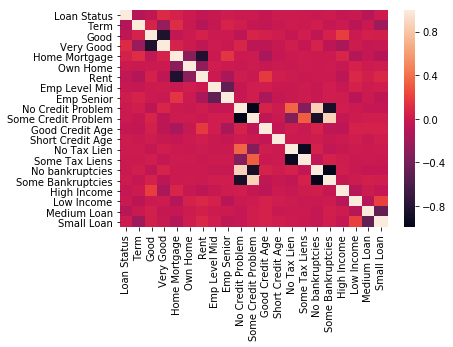

In [193]:
sns.heatmap(df_train.corr())

#### Handling Human Error Data


In [64]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


The Average Credit Score is 1076+: This is strange considering the Credit Score should be within the range of 300_900.

 Handling incorrect Data (Example: Credit Score should never be above 900 but in our dataset, we have Credit Score till 9000).
 

In [65]:
#  Trying to have a look and find sense of the Credit Score data
#  Check for any values that are greater than 900


df= df_train[df_train['Credit Score']>900]
df.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.00,Short Term,7290.00,896857.00,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.30,nan,6.00,0.00,215308.00,272448.00,0.00,0.00
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.00,Short Term,7120.00,537472.00,10+ years,Rent,Debt Consolidation,5777.90,14.80,nan,4.00,0.00,132468.00,164406.00,0.00,0.00


#### Scaling the  Human Error Data

It looks like some of the credit score are just scaled up by 10> For ease of our calculation, Let's Consider scaling them back for accuracy.

In [66]:
# Scaling the Credit SCore Column

df_train['Credit Score'] = df_train['Credit Score'].apply(lambda val: (val /10) if val>900 else val)

In [67]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,716.29,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,28.30,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,703.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,722.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,738.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00



Now our Average Credit Score is within a Normal Credit Score Range

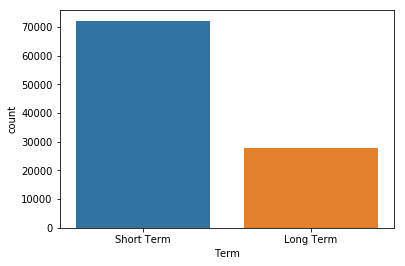

In [27]:
sns.countplot(data=df_train, x='Term')
plt.show()

2). With 'Home Ownership' coulmn

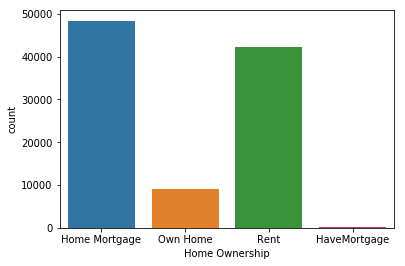

In [68]:
sns.countplot(data=df_train, x='Home Ownership')
plt.show()

3). With 'Purpose' column

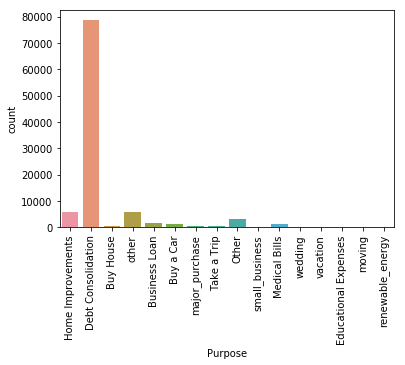

In [70]:
sns.countplot(data=df_train, x='Purpose')
plt.xticks(rotation=90)
plt.show()

4). With 'Loan Status' column.

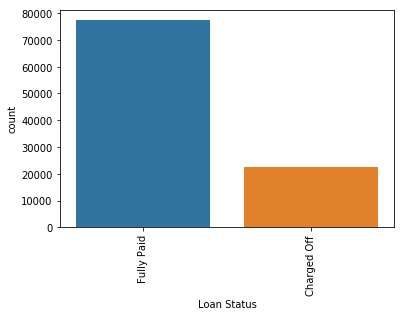

In [71]:
sns.countplot(data=df_train, x='Loan Status')
plt.xticks(rotation=90)
plt.show()

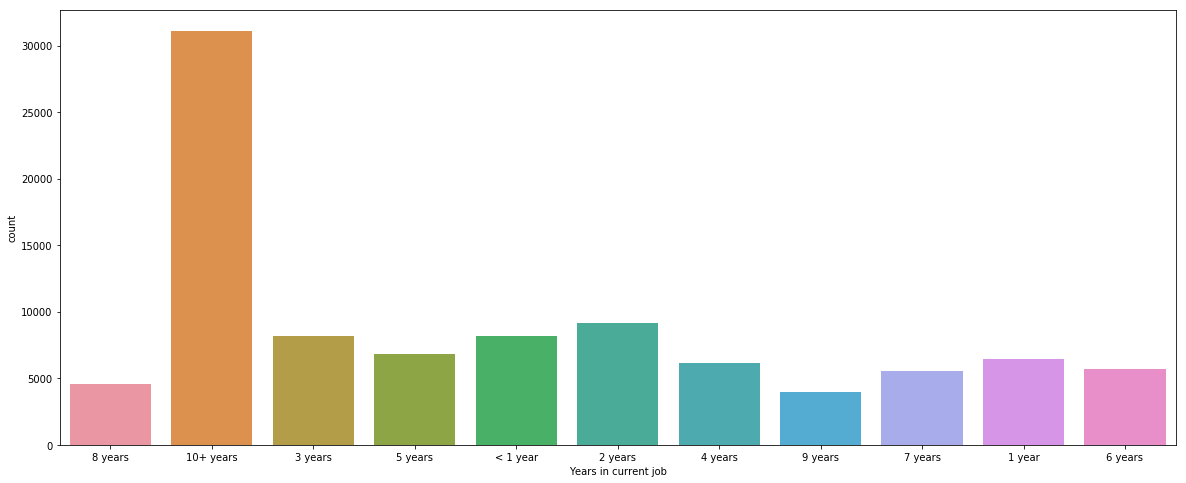

In [32]:
plt.figure(figsize=(20,8))

sns.countplot(df_train['Years in current job'])

In [72]:
df_train.dropna(subset=['Loan Status'], inplace = True)

In [73]:
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)

le = preprocessing.LabelEncoder()
df_train['Loan Status'] = le.fit_transform(df_train['Loan Status'])

#### Loan Status is the Categorical Variable here denoting if the certain variable is paid off or not. 
Here we aim to predict that as our final output

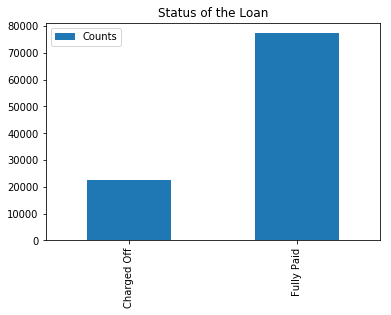

In [74]:
coffvalue = df_train[df_train['Loan Status'] == 0]['Loan Status'].count()
fpaidvalue = df_train[df_train['Loan Status'] == 1]['Loan Status'].count()
data = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

In [36]:
print("Value counts for each term: \n",df_train['Term'].value_counts())
print("Missing data in loan term:",df_train['Term'].isna().sum())

Value counts for each term: 
 Short Term    72208
Long Term     27792
Name: Term, dtype: int64
Missing data in loan term: 0


In [75]:
df_train['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
df_train.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00


In [76]:
scount = df_train[df_train['Term'] == 0]['Term'].count()
lcount = df_train[df_train['Term'] ==1]['Term'].count()

data = {"Counts":[scount, lcount]}
termDF = pd.DataFrame(data, index=["Short Term", "Long Term"])
termDF.head()

,Counts
Short Term,72208
Long Term,27792


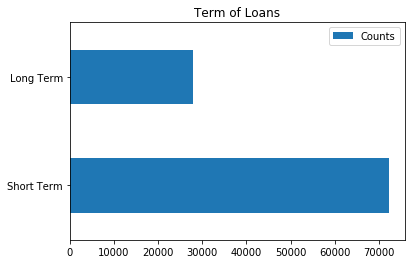

In [77]:
termDF.plot(kind="barh", title="Term of Loans")

Credit Score is one of the important part of our Analysis.

We first try and handle our missing data before further processing with anything.

#### Assumption

We assume that the credit score of people having short term loans wouldn't be the same as the credit score of people having long term loans.

Thus we take separare average of the people with short term loan and separate average of people with long term loan and then fill the Missing Credit SCore looking up at the term of the loan.

We will handle the missing data through filling the average of the Credit Score Column in the place of missing data.

In [78]:
print("There are ", df_train['Credit Score'].isna().sum(), "null values for Credit score.")

There are  19154 null values for Credit score.


In [79]:
cscoredf = df_train[df_train['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
print(stermAVG)

724.6209386906824


In [80]:
lscoredf =  df_train[df_train['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
print(ltermAVG)

695.483727170432


In [44]:
do_nothing = lambda: None

In [81]:
df_train.loc[(df_train.Term ==0) & (df_train['Credit Score'].isnull()),'Credit Score'] = stermAVG

In [82]:
df_train.loc[(df_train.Term ==1) & (df_train['Credit Score'].isnull()),'Credit Score'] = ltermAVG

Since our problem is a classification problem, we can't have continuos variables in our dataframe. After the calculation of the missing variables we give our credit scores a range based on Experian's Credit Score Range.

In [83]:
df_train['Credit Score'] = df_train['Credit Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df_train['Credit Score'] = df_train['Credit Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
df_train['Credit Score'] = df_train['Credit Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df_train['Credit Score'] = df_train['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df_train['Credit Score'] = df_train['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 900) else val)

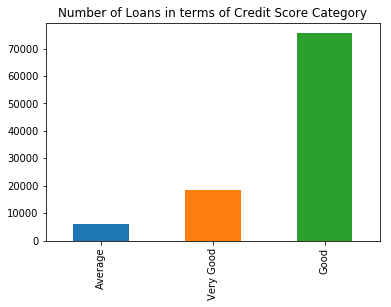

In [84]:
df_train['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of Loans in terms of Credit Score Category')

#### Look up at the Annual Inconme and fill up the Missing Values with the Average of the Colummn

In [85]:
print("There are",df_train['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 19154 Missing Annual Income Values.


In [55]:
df_train['Annual Income'].fillna(df_train['Annual Income'].mean(), inplace=True)

We will change the Credit Score values to a discrete value.

We will use One Hot Encoding to make sure we dont increase the dimension of our data.

We will also look out for potential Multi-Colinearity as we drop one variable of the encoding.


In [86]:
df_train = df_train.join(pd.get_dummies(df_train['Credit Score'], drop_first = True))

Since our values were only adjectives, we give it new names to make it more clear.

In [91]:
df_train.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})
df_train.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,Good,1167493.00,8 years,Home Mortgage,Home Improvements,...,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,Good,nan,10+ years,Home Mortgage,Debt Consolidation,...,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00,1,0


In [92]:
df_train= df_train.drop(['Credit Score'], axis=1)

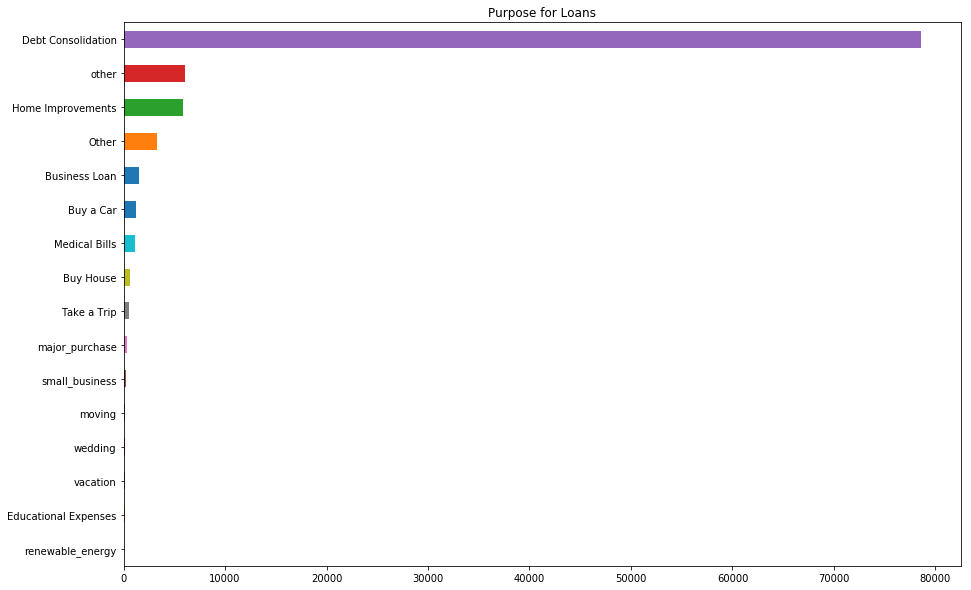

In [93]:
df_train['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Purpose for Loans", figsize=(15,10))

In [94]:
purposeloanstatus = df_train[['Purpose','Loan Status']]
purposeloanstatus.head()

,Purpose,Loan Status
0,Home Improvements,1
1,Debt Consolidation,1
2,Debt Consolidation,1
3,Debt Consolidation,1
4,Debt Consolidation,1


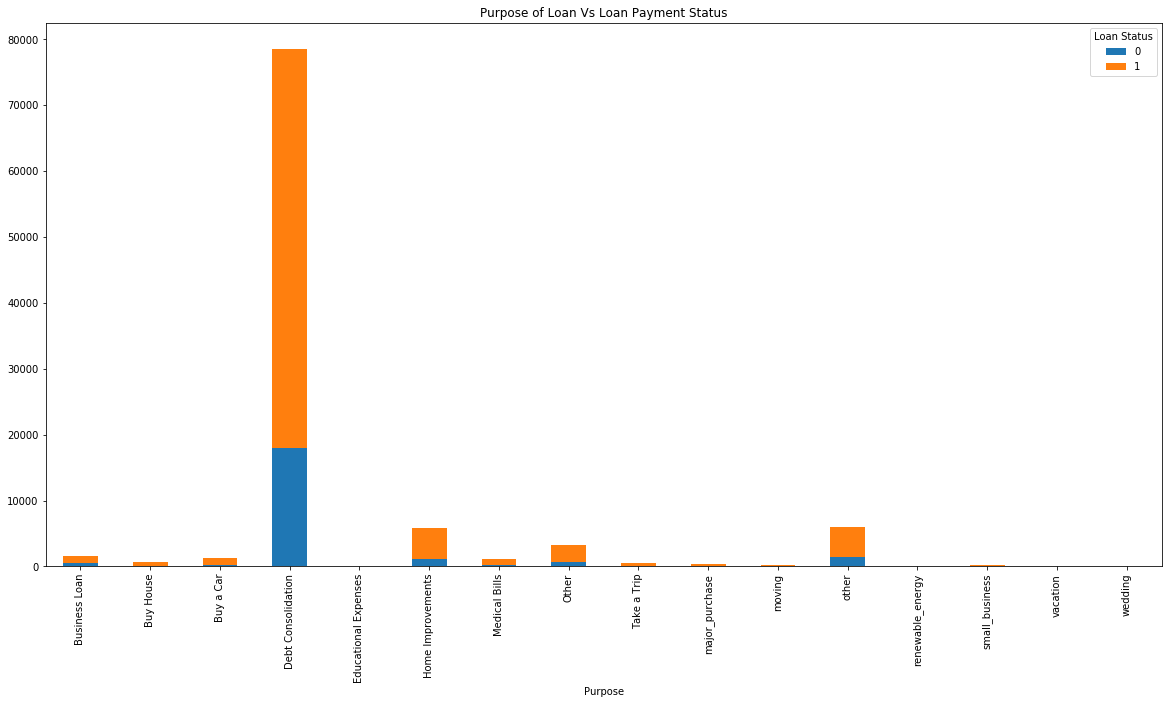

In [384]:
pd.crosstab(purposeloanstatus['Purpose'], purposeloanstatus['Loan Status']).plot(kind='bar', stacked=True, figsize=(20,10), title="Purpose of Loan Vs Loan Payment Status", )

Next up, we take a look at the Home ownership status of the people who have taken loan and try to visualize it.

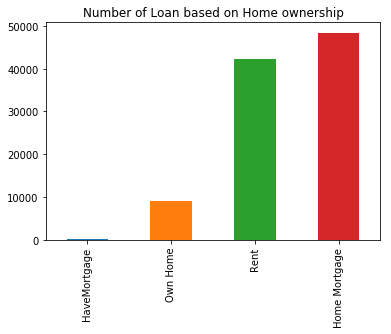

In [95]:
df_train['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

As we can see most of the loans have been either by the people have mortgage on their home or by people who are in rent.

In [96]:
df_train = df_train.join(pd.get_dummies(df_train['Home Ownership'],drop_first = True))

In [97]:
df_train= df_train.drop(['Home Ownership'], axis=1)

Age of Employment is one of the major factors in deciding the person's financial stability and secure income sources.

Here our data is with a String non-uniform spread. First we need to extract the given numbers and then give it a uniform range to convert it into a categorical variable.


In [98]:
# Dataframe ['Years in current job'].fillna(dataframe['Years in current job'].mean(), inplace = True)

df_train['Years in current job']=df_train['Years in current job'].str.extract(r"(\d+)")
df_train['Years in current job'] = df_train['Years in current job'].astype(float)

In [99]:
expmean = df_train['Years in current job'].mean()

In [100]:
df_train['Years in current job'].fillna(expmean, inplace=True)

Now That we have a numerical value for our Employment Age, we use a uniform range to convert it into Categories.

In [103]:
df_train['Employment History'] = df_train['Years in current job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))

In [104]:
df_train.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Employment History
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.00,0,1167493.00,8.00,Home Improvements,5214.74,17.20,...,228190.00,416746.00,1.00,0.00,1,0,1,0,0,Emp Senior
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.00,0,nan,10.00,Debt Consolidation,33295.98,21.10,...,229976.00,850784.00,0.00,0.00,1,0,1,0,0,Emp Senior
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.00,0,2231892.00,8.00,Debt Consolidation,29200.53,14.90,...,297996.00,750090.00,0.00,0.00,0,1,0,1,0,Emp Senior


In [105]:
df_train = df_train.drop(['Years in current job'], axis=1)


We will use One Hot Encoding on the Emplyment History Column now that we have the categories.


In [106]:
df_train = df_train.join(pd.get_dummies(df_train['Employment History'],drop_first = True))

Drop the Employment History Column.

In [107]:
df_train = df_train.drop(['Employment History'], axis=1)

If we take a look at our data, there are columns like Loan ID, Customer ID which isn't important for our analysis. While we can argue in some cases purpose of loan could be one deciding factor but here we consider it to be unimportant and drop that as well.

In [109]:
df_train= df_train.drop(['Loan ID','Customer ID','Purpose'], axis=1)

Lets split the Number of Credit Problems reported  for each individual loanee into three categories with 0 being None, 1-5 as Some and More than 5 to be Major Credit Problems.


In [113]:
df_train['Credit Problems'] = df_train['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit Problem" if x>0 and x<5 else "Major Credit Problems"))

In [114]:
df_train['Credit Problems'].value_counts()

No Credit Problem        86025
Some Credit Problem      13877
Major Credit Problems       86
Name: Credit Problems, dtype: int64

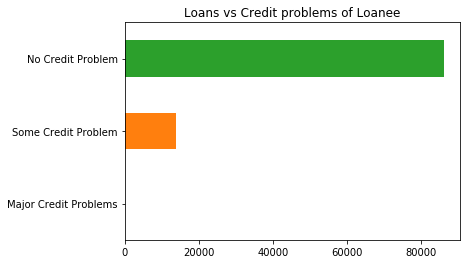

In [115]:
df_train['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

Looking at the graph above, we establish a common asumption that loans are generally not given to people having credit problems. Next up, we convert Credit Problems into discrete variables

In [117]:
df_train = df_train.join(pd.get_dummies(df_train['Credit Problems'],drop_first = True))

In [118]:
df_train = df_train.drop(['Credit Problems','Number of Credit Problems'], axis=1)

In [119]:
df_train .head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,...,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem
0,1,445412.00,0,1167493.00,5214.74,17.20,nan,6.00,228190.00,416746.00,...,0.00,1,0,1,0,0,0,1,0,1
1,1,262328.00,0,nan,33295.98,21.10,8.00,35.00,229976.00,850784.00,...,0.00,1,0,1,0,0,0,1,1,0
2,1,99999999.00,0,2231892.00,29200.53,14.90,29.00,18.00,297996.00,750090.00,...,0.00,0,1,0,1,0,0,1,0,1
3,1,347666.00,1,806949.00,8741.90,12.00,nan,9.00,256329.00,386958.00,...,0.00,1,0,0,1,0,0,0,1,0
4,1,176220.00,0,nan,20639.70,6.10,nan,15.00,253460.00,427174.00,...,0.00,1,0,0,0,1,1,0,1,0


Years of Credit History is another important feature fo financial stability identification.

We look at the given credit age of individuals and categorize them using One Hot Encoding

In [120]:
df_train['Credit Age'] =df_train['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [122]:
df_train = df_train.join(pd.get_dummies(df_train['Credit Age'],drop_first = True))

In [123]:
df_train = df_train.drop(['Credit Age','Years of Credit History'], axis =1)
df_train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Months since last delinquent,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem,Good Credit Age,Short Credit Age
0,1,445412.00,0,1167493.00,5214.74,nan,6.00,228190.00,416746.00,1.00,...,0,1,0,0,0,1,0,1,0,0
1,1,262328.00,0,nan,33295.98,8.00,35.00,229976.00,850784.00,0.00,...,0,1,0,0,0,1,1,0,0,0
2,1,99999999.00,0,2231892.00,29200.53,29.00,18.00,297996.00,750090.00,0.00,...,1,0,1,0,0,1,0,1,1,0
3,1,347666.00,1,806949.00,8741.90,nan,9.00,256329.00,386958.00,0.00,...,0,0,1,0,0,0,1,0,1,0
4,1,176220.00,0,nan,20639.70,nan,15.00,253460.00,427174.00,0.00,...,0,0,0,1,1,0,1,0,1,0


We move forward with the asumption that some of the columns are correlated with the others and hence we try to reduce the number of features. For example, we have credit score and credit problems which can is calculated using features like maximum open credit, current credit balance etc. So we drop some of the columns that we asume are already covered by features we have on our dataframe.



In [124]:
df_train = df_train.drop(['Months since last delinquent','Number of Open Accounts','Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [125]:
df_train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Tax Liens,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem,Good Credit Age,Short Credit Age
0,1,445412.00,0,1167493.00,1.00,0.00,1,0,1,0,0,0,1,0,1,0,0
1,1,262328.00,0,nan,0.00,0.00,1,0,1,0,0,0,1,1,0,0,0
2,1,99999999.00,0,2231892.00,0.00,0.00,0,1,0,1,0,0,1,0,1,1,0
3,1,347666.00,1,806949.00,0.00,0.00,1,0,0,1,0,0,0,1,0,1,0
4,1,176220.00,0,nan,0.00,0.00,1,0,0,0,1,1,0,1,0,1,0


Further exploring the financial stability of each loanee, we take the look at number of liens on their property by court which would give us information about their previous commitments.

In [126]:
df_train['Tax Liens'] = df_train['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [127]:
df_train = df_train.join(pd.get_dummies(df_train['Tax Liens'],drop_first = True))


In [128]:
df_train = df_train.drop(['Tax Liens'],axis=1)
df_train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Bankruptcies,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens
0,1,445412.00,0,1167493.00,1.00,1,0,1,0,0,0,1,0,1,0,0,1,0
1,1,262328.00,0,nan,0.00,1,0,1,0,0,0,1,1,0,0,0,1,0
2,1,99999999.00,0,2231892.00,0.00,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,347666.00,1,806949.00,0.00,1,0,0,1,0,0,0,1,0,1,0,1,0
4,1,176220.00,0,nan,0.00,1,0,0,0,1,1,0,1,0,1,0,1,0



Lets take a look at the number of Bankruptcies filed by people and categorize them.


In [129]:
df_train['Bankruptcies'] = df_train['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [130]:
df_train = df_train.join(pd.get_dummies(df_train['Bankruptcies'],drop_first = True))

In [131]:
df_train = df_train.drop(['Bankruptcies'],axis=1)
df_train.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,1,445412.00,0,1167493.00,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,1,262328.00,0,nan,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0
2,1,99999999.00,0,2231892.00,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,1,347666.00,1,806949.00,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0
4,1,176220.00,0,nan,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0


In [132]:
df_train.describe()

,Loan Status,Current Loan Amount,Term,Annual Income,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
count,99988.00,99988.00,99988.00,80839.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00,99988.00
mean,0.77,11760845.89,0.28,1378286.97,0.76,0.18,0.48,0.09,0.42,0.22,0.46,0.86,0.14,0.50,0.00,0.98,0.02,0.89,0.11
std,0.42,31784390.14,0.45,1081397.72,0.43,0.39,0.50,0.29,0.49,0.42,0.50,0.35,0.35,0.50,0.04,0.14,0.13,0.32,0.31
min,0.00,10802.00,0.00,76627.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,179652.00,0.00,848844.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
50%,1.00,312268.00,0.00,1174105.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
75%,1.00,524942.00,1.00,1650682.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,1.00,99999999.00,1.00,165557393.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


We already know we're predicting categorical variables hence we have to convert our cateorical variables into discrete. Next up we try to convert annual income and total loan amount into discrete variables. There are some calculation we do before deciding a range from the categories. If we take a look, we have some data that are outliers and are way off the other loan amounts. so we try to calculate the average and standard deviation without the outlier. We asume : Mean - 1 standard deviation = low income line Mean + 1 standard deviation = high income line and similar for the loan amount as well.

In [133]:
meanxoutlier = df_train[df_train['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = df_train[df_train['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [134]:
df_train['Annual Income'] = df_train['Annual Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))

In [135]:
df_train = df_train.join(pd.get_dummies(df_train['Annual Income'],drop_first = True))

In [137]:
df_train= df_train.drop(['Annual Income'], axis=1)
df_train.head()

,Loan Status,Current Loan Amount,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit Problem,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income
0,1,445412.00,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,262328.00,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0
2,1,99999999.00,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0
3,1,347666.00,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
4,1,176220.00,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [138]:
lmeanxoutlier = df_train[df_train['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = df_train[df_train['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126078.85429513542 498597.05332590296


In [139]:
df_train['Current Loan Amount'] = df_train['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [140]:
df_train = df_train.join(pd.get_dummies(df_train['Current Loan Amount'],drop_first = True))

In [141]:
df_train = df_train.drop(['Current Loan Amount'], axis=1)

In [142]:
df_train.head()

,Loan Status,Term,Good,Very Good,Home Mortgage,Own Home,Rent,Emp Level Mid,Emp Senior,No Credit Problem,...,Good Credit Age,Short Credit Age,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,High Income,Low Income,Medium Loan,Small Loan
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,1,0,1,0,1,0
2,1,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,1,0



We now have all the Categorical Variable values for our dataframe. 

We will divide the dataframe into training and testing set and plug into some Classification Algorithm

## The Model Building Process

In [164]:
y = df_train['Loan Status']
X = df_train.drop(['Loan Status'],axis=1)

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [173]:
# y_true = y_test

knnclassifier = KNeighborsClassifier(n_neighbors = int(X.shape[1]/2))
knnclassifier.fit(X_train, y_train)
prediction = knnclassifier.predict(X_test)
print("The Accuracy Score is: ", accuracy_score(y_test, prediction))

The Accuracy Score is:  0.7360366093887323


In [174]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, prediction).ravel()
print(tneg,fpos,fneg,tpos)

884 6592 2118 23403


In [177]:
lregclassifier = LogisticRegression()
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.7733733369700275


In [178]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

6 7470 8 25513


In [179]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel ='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("The Accuracy Score is: ", accuracy_score(y_test, pred))

The Accuracy Score is:  0.7734339485407764


In [180]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, pred).ravel()
print(tneg,fpos,fneg,tpos)

0 7476 0 25521


In [184]:
XGBclf = XGBClassifier()
XGBclf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [186]:
XGBpred = XGBclf.predict(X_test)
print("The Accuracy Score is: ", accuracy_score(y_test, XGBpred))

The Accuracy Score is:  0.7732824196139043


In [188]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, XGBpred).ravel()
print(tneg,fpos,fneg,tpos)

6 7470 11 25510


In [189]:
SGDclf = SGDClassifier(loss='modified_huber',shuffle=True)
SGDclf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [190]:
SGDpred = SGDclf.predict(X_test)
print("The Accuracy Score is: ", accuracy_score(y_test, SGDpred))

The Accuracy Score is:  0.7730399733309089


In [191]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, SGDpred).ravel()
print(tneg,fpos,fneg,tpos)

16 7460 29 25492
